Import Libraries

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.manifold import Isomap
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv("drive/MyDrive/datasets/dataset.csv", index_col=0)
column_names = list(df.columns)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = df.iloc[:, 0:279].replace(' ', np.nan)
target = df.iloc[:, 279].astype('int32')

Predict Missing Values Using Simple Imputer

In [ ]:
simpleimputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data= pd.DataFrame(simpleimputer.fit_transform(data), columns=column_names[0:279]) # intro, metho, resut, concluso, references

In [ ]:
iso = Isomap(n_components=29)
iso.fit_transform(data)
data= pd.DataFrame(iso.fit_transform(data))

In [ ]:
"""pca = PCA(n_components=29)
data= pd.DataFrame(pca.fit_transform(data))
#data"""

'pca = PCA(n_components=29)\ndata= pd.DataFrame(pca.fit_transform(data))\n#data'

In [ ]:
standardsclaer = StandardScaler()
data= pd.DataFrame(standardsclaer.fit_transform(data))

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3, random_state=1)
accuracy_df = pd.DataFrame(columns=["Test", "F1", "Accuracy"])

Neural Network

In [ ]:
neuralnetwork = MLPClassifier(hidden_layer_sizes=50)
neuralnetwork.fit(train_data, train_target)
NN_test_result = neuralnetwork.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, NN_test_result))
print("Accurace Score:", accuracy_score(test_target, NN_test_result))
print("F1 Score:", f1_score(test_target, NN_test_result, average='weighted'))
temp = pd.DataFrame([["NN", f1_score(test_target, NN_test_result, average='weighted'), accuracy_score(test_target, NN_test_result)]], columns=["Test","F1", "Accuracy"])
accuracy_df = accuracy_df.append(temp, ignore_index=True)
accuracy_df

confusion_matrix: [[63  5  0  2  0  2  0  0  1  0  0]
 [ 9  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 3  1  0  1  1  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  1  0  0  1]
 [11  0  0  0  0  0  0  0  5  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]]
Accurace Score: 0.5882352941176471
F1 Score: 0.5326737237554018


,Test,F1,Accuracy
0,NN,0.532674,0.588235


AdaBoost Classifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=29)
adaboost.fit(train_data, train_target)
ADA_test_result = adaboost.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, ADA_test_result))
print("Accurace Score:", accuracy_score(test_target, ADA_test_result))
print("F1 Score:", f1_score(test_target, ADA_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["ab", f1_score(test_target, ADA_test_result, average='weighted'), accuracy_score(test_target, ADA_test_result)]], columns=["Test","F1", "Accuracy"]), ignore_index=True)
accuracy_df

confusion_matrix: [[70  2  0  0  0  0  0  1  0  0  0]
 [ 9  2  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 5  1  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  2  0  0  0]
 [15  1  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]]
Accurace Score: 0.5441176470588235
F1 Score: 0.4115731586752348


,Test,F1,Accuracy
0,NN,0.532674,0.588235
1,ab,0.411573,0.544118


In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(train_data, train_target)
knn_test_result = knn.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, knn_test_result))
print("Accurace Score:", accuracy_score(test_target, knn_test_result))
print("F1 Score:", f1_score(test_target, knn_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["knn", f1_score(test_target, knn_test_result, average='weighted'), accuracy_score(test_target, knn_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[73  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  1  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]]
Accurace Score: 0.5441176470588235
F1 Score: 0.39060836438647856


In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gb.fit(train_data, train_target)
gb_test_result = gb.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, gb_test_result))
print("Accurace Score:", accuracy_score(test_target, gb_test_result))
print("F1 Score:", f1_score(test_target, gb_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["gb", f1_score(test_target, gb_test_result, average='weighted'), accuracy_score(test_target, gb_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[72  0  0  0  0  0  0  1  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0]
 [ 3  1  4  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  1  1  0  0]
 [14  1  0  0  0  0  0  0  1  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]]
Accurace Score: 0.5735294117647058
F1 Score: 0.4505041547607318


In [ ]:
nb = GaussianNB()
nb.fit(train_data, train_target)
nb_test_result = nb.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, nb_test_result))
print("Accurace Score:", accuracy_score(test_target, nb_test_result))
print("F1 Score:", f1_score(test_target, nb_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["nb", f1_score(test_target, nb_test_result, average='weighted'), accuracy_score(test_target, nb_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[61  3  0  1  0  3  0  0  2  0  3]
 [ 4  6  0  0  0  0  0  0  1  0  0]
 [ 0  3  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 3  1  0  1  0  0  0  0  1  0  0]
 [ 4  2  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  1]
 [ 6  6  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0]
 [ 4  2  0  0  0  1  0  0  0  0  0]]
Accurace Score: 0.5882352941176471
F1 Score: 0.5586587576206954


In [ ]:
sv = SVC()
sv.fit(train_data, train_target)
sv_test_result = sv.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, sv_test_result))
print("Accurace Score:", accuracy_score(test_target, sv_test_result))
print("F1 Score:", f1_score(test_target, sv_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["sv", f1_score(test_target, sv_test_result, average='weighted'), accuracy_score(test_target, sv_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[73  0  0  0  0  0  0  0  0  0  0]
 [10  1  0  0  0  0  0  0  0  0  0]
 [ 7  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  1  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  2  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]]
Accurace Score: 0.5661764705882353
F1 Score: 0.4368512110726645


In [ ]:
rf = RandomForestClassifier()
rf.fit(train_data, train_target)
rf_test_result = rf.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, rf_test_result))
print("Accurace Score:", accuracy_score(test_target, rf_test_result))
print("F1 Score:", f1_score(test_target, rf_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["rf", f1_score(test_target, rf_test_result, average='weighted'), accuracy_score(test_target, rf_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[69  4  0  0  0  0  0  0  0  0  0]
 [ 8  3  0  0  0  0  0  0  0  0  0]
 [ 5  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  2  0  0  1]
 [11  1  0  0  0  0  0  0  4  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]]
Accurace Score: 0.5955882352941176
F1 Score: 0.5139765635121671


In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.01, n_estimators=100)
xg.fit(train_data, train_target)
xg_test_result = xg.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, xg_test_result))
print("Accurace Score:", accuracy_score(test_target, xg_test_result))
print("F1 Score:", f1_score(test_target, xg_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["xg", f1_score(test_target, xg_test_result, average='weighted'), accuracy_score(test_target, xg_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[72  0  0  1  0  0  0  0  0  0  0  0]
 [10  1  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  2  0  0  1  0]
 [14  0  0  0  1  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0]]
Accurace Score: 0.5882352941176471
F1 Score: 0.47627251516801516


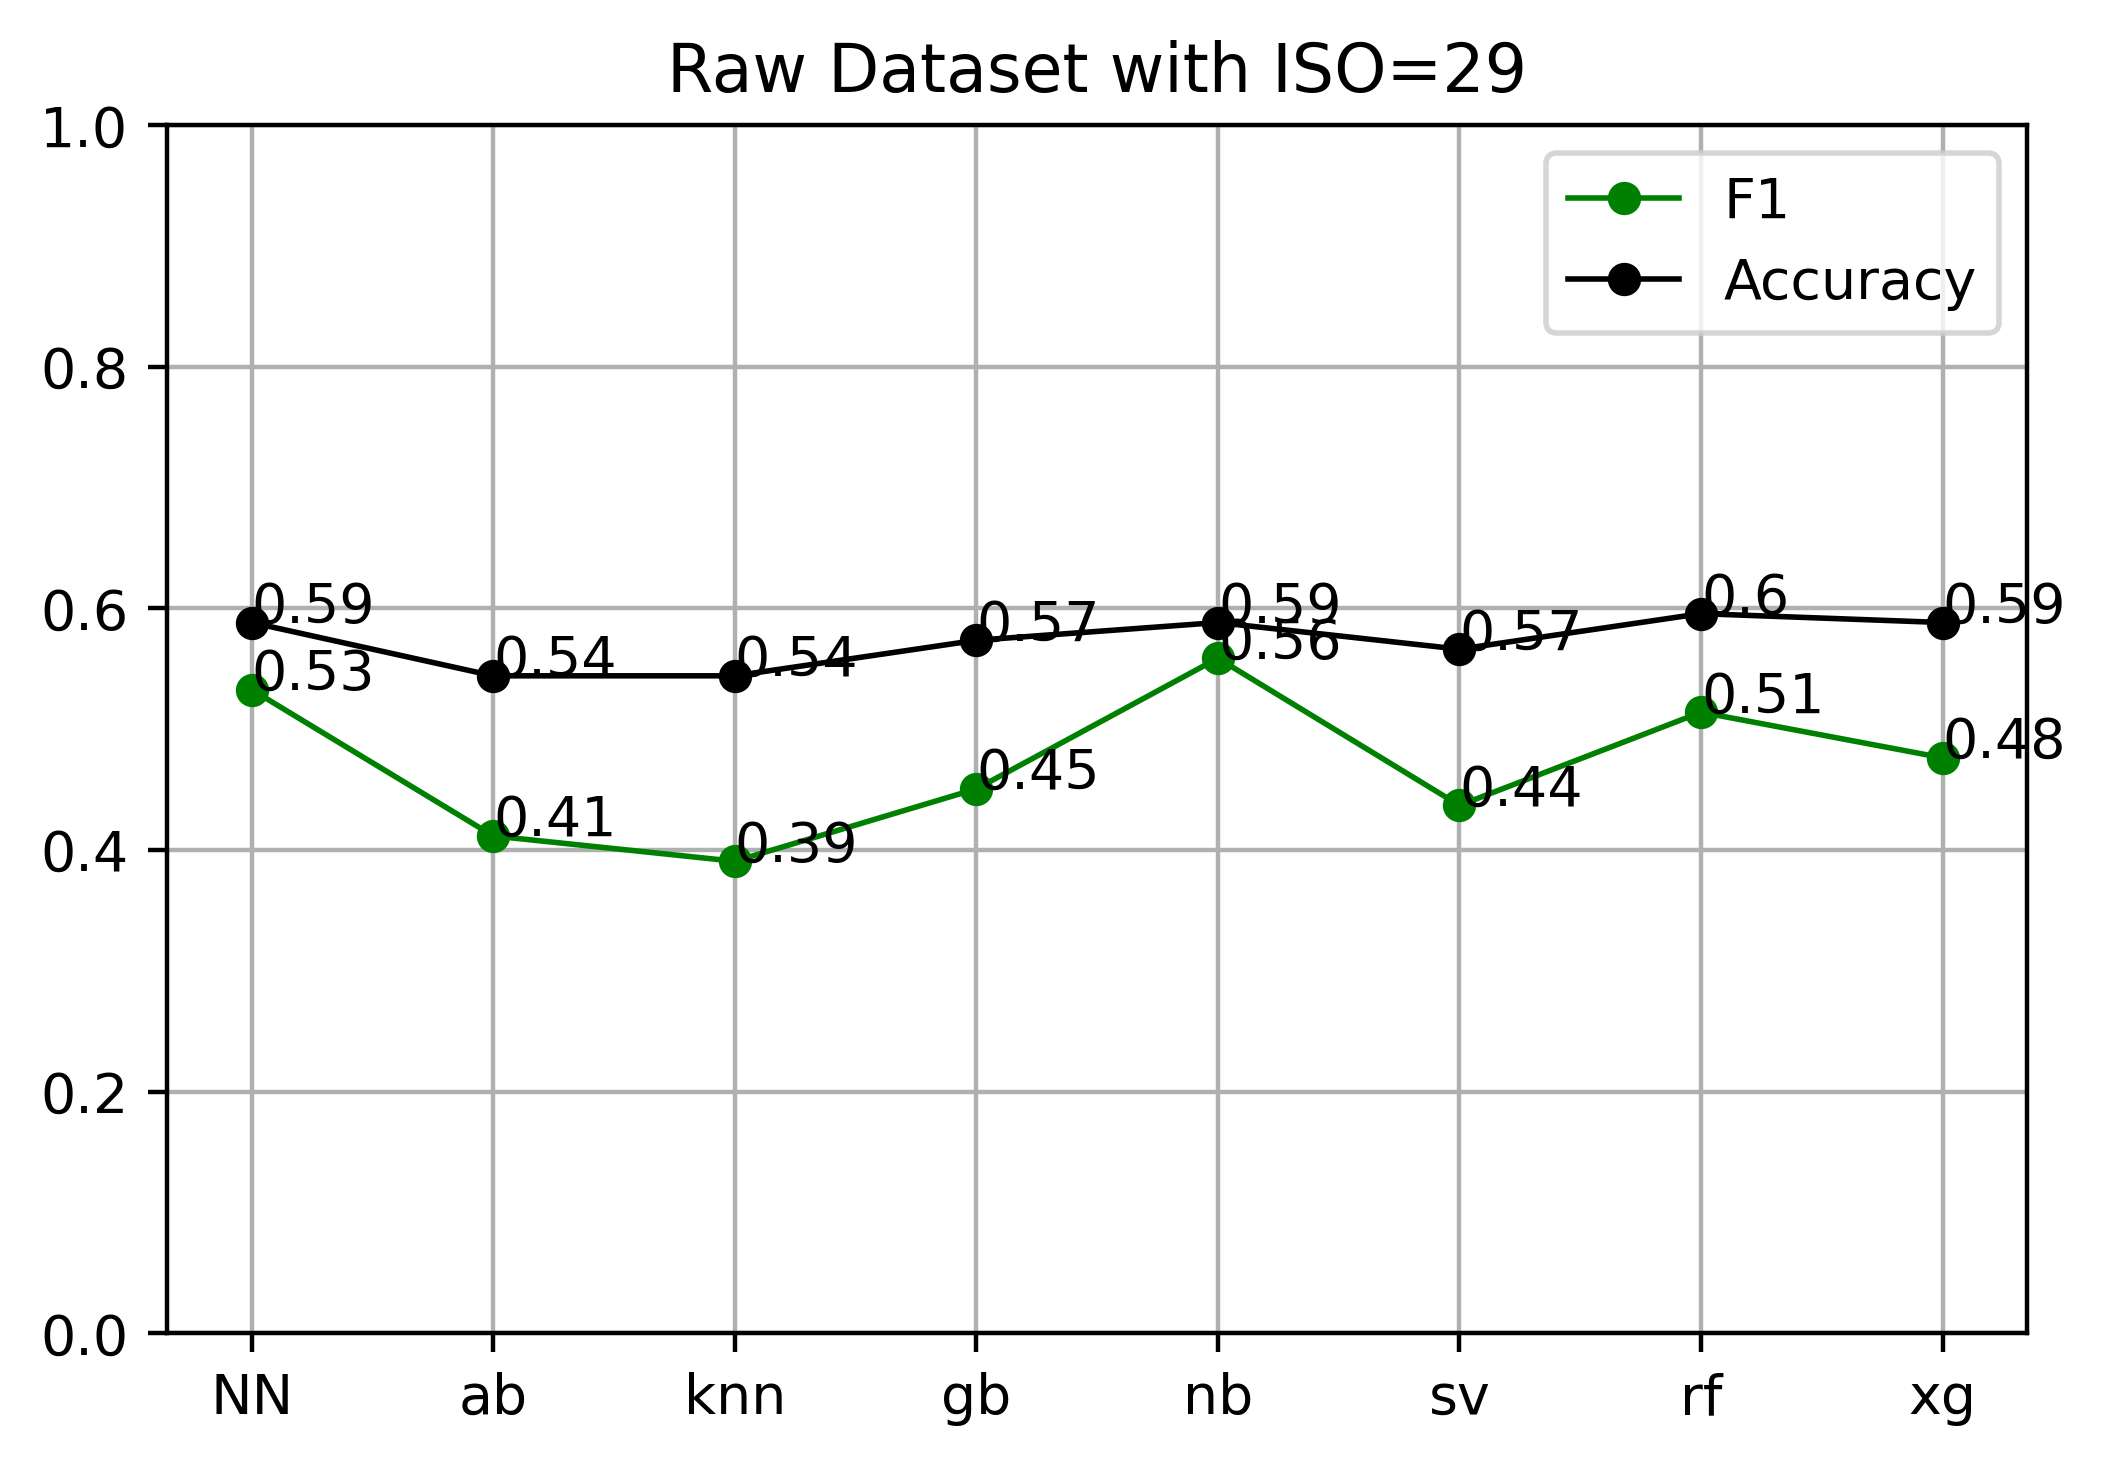

In [ ]:
#plt.figure(dpi=400)
nameofthefile= "Raw Dataset with ISO=29"
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)

plt.ylim(0, 1)
plt.plot( 'Test', 'F1', data=accuracy_df, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=1)
plt.plot( 'Test', 'Accuracy', data=accuracy_df, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=1)
plt.grid()

plt.legend()
for i, j in enumerate(accuracy_df['F1']):
  ax.annotate(str(round(j, 2)), (list(accuracy_df['Test'])[i],list(accuracy_df['F1'])[i]))
for i, j in enumerate(accuracy_df['Accuracy']):
  ax.annotate(str(round(j, 2)), (list(accuracy_df['Test'])[i],list(accuracy_df['Accuracy'])[i]))
plt.title(nameofthefile)
plt.savefig(f"drive/MyDrive/datasets/{nameofthefile}.png")
plt.show()